# Notebook activity 6.10 Diagnostic plots for logistic regression in R

In Notebook activity 6.4, we fitted the logistic regression model:

`resAndDev ~ averageWage + country + product`,

using data from the European companies dataset, and in Notebook activity 6.5 we considered the fit of this model.

In this notebook activity, we will use R to produce diagnostic plots for this model so that we can check the model assumptions. 

As a reminder, the variables are defined as follows:

* `resAndDev`: a binary variable taking the values 1 (if the company participates in research and development) and 0 (if the company doesn't participate in research and development),

* `averageWage`: average wage of an employee in 2018 (calculated by taking the cost of the employees for that company in 2018 (in thousands of Euro) and dividing by the number of employees in 2018).

* `country`: a categorical variable taking the values GB (for United Kingdom of Great Britain and Northern Ireland), FR (for France) and DE (for Germany),

* `product`: a categorical variable  giving the industrial classification linked to what a company produces taking the coded following values: 10 (for manufacture of food products), 20 (for manufacture of chemicals and chemical products), 22 (for manufacture of rubber and plastic products), 26 (for manufacture of computer, electronic and optimal products), 27 (for manufacture of electrical equipment).

The data are stored in the `europeanCompanies` data frame.

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the europeanCompanies data frame
data(europeanCompanies)
# Check the data frame has loaded OK
head(europeanCompanies)

## (b) Fitting logistic regression model

### (i)

Use the empty code cell below to fit the logistic regression model with response variable `resAndDev` and explanatory variables `averageWage`, `country` and `product`, storing the result in an object called `resAndDevFit`. Obtain a summary of the results from fitting the model.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [2]:
resAndDevFit <- glm(resAndDev ~ averageWage + country + product, 
                    family = binomial, data = europeanCompanies)
summary(resAndDevFit)


Call:
glm(formula = resAndDev ~ averageWage + country + product, family = binomial, 
    data = europeanCompanies)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9529  -0.7788  -0.4026   0.9085   2.3079  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.60197    0.66665  -5.403 6.55e-08 ***
averageWage  0.01391    0.00798   1.743 0.081285 .  
countryFR   -0.19294    0.56843  -0.339 0.734286    
countryGB    1.81956    0.44707   4.070 4.70e-05 ***
product20    1.60340    0.45347   3.536 0.000407 ***
product22    0.49838    0.48409   1.030 0.303236    
product26    1.96479    0.44030   4.462 8.11e-06 ***
product27    1.01637    0.53416   1.903 0.057073 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 340.88  on 269  degrees of freedom
Residual deviance: 275.41  on 262  degrees of freedom
AIC: 291.41

Number of Fisher Scoring iterat

## (c) Producing diagnostic plots

In Notebook activities 2.4 and 4.1, you saw that to produce diagnostic plots for linear models in R, we can use the `plot()` function. This function is for *linear* models, but, here we want to produce diagnostic plots for a *logistic regression* model.

To do this, a bespoke R function has been written for M348, which can produce diagnostic plots for a fitted logistic regression model. In fact, the function can produce diagnostic plots for other generalised linear models too. (Remember that the logistic regression model is a particular type of generalised linear model.)

Like the `plot()` function, the `glmResidPlot()` can provide different types of diagnostic plot. Assuming that the model we wish to produce diagnostic plots for is stored in an object called `modelFit`, the commands are as follows:

* to produce a **residuals versus transformed fitted means plot**, we use the command `glmResidPlot(modelFit,1)`
* to produce a **plot of residuals against index number**, we use the command `glmResidPlot(modelFit,2)`
* to produce an **index plot of squared residuals**, we use the command `glmResidPlot(modelFit,3)`
* to produce  a **normal probability plot of residuals**, we use the command `glmResidPlot(modelFit,4)`.

In each the residuals that are used are standardised deviance residuals. So these four diagnostic plots are the same four types of plot considered in Subsection 7.3 of Unit 6.

### (i)

Remove the `#` and adapt the code below to produce a residuals versus transformed fitted mean plot for the model you fitted in part (b)(i).

In [3]:
# glmResidPlot(modelFit, 1)

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

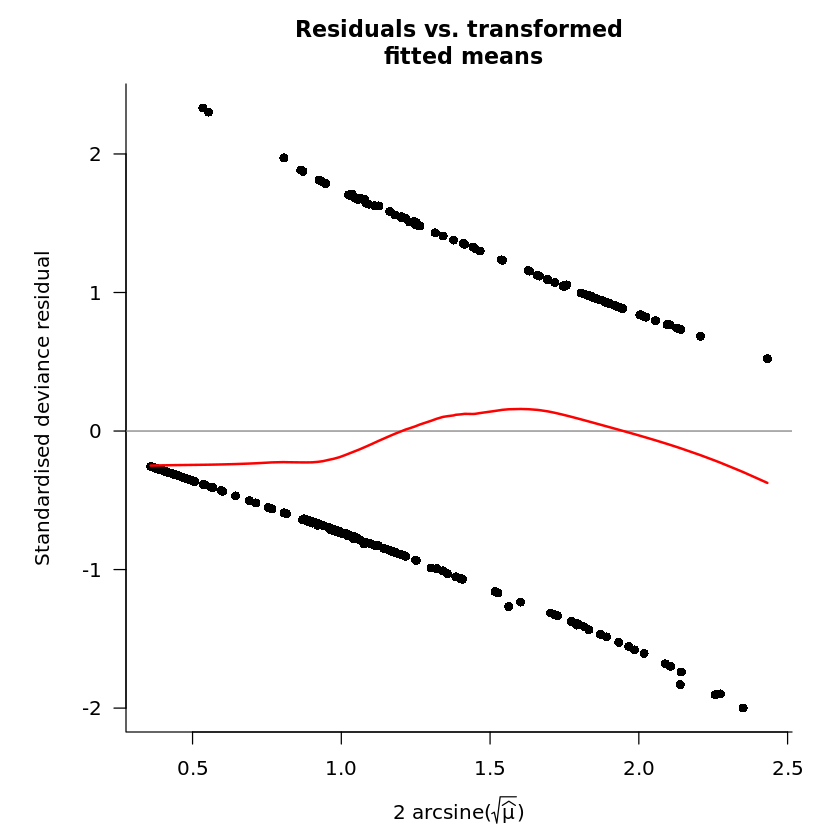

In [4]:
glmResidPlot(resAndDevFit, 1)

### (ii)

Does the plot you obtained in part (c)(ii) suggest any problems with the model fitted in part (b)(i)?

#### Solution <a class="tocSkip">

As expected, the two 'lines' associated with the two possible values of the response can be clearly seen in the plot of the standardised deviance residuals against a transformation of the response mean. The smoothed red line in the plot shows some curvature casting some doubt on the linearity assumption. The logit link function may not be appropriate or we may be missing some higher order terms in the model for one or more of the explanatory variables. 

### (iii)

Remove the `#` and adapt the code below to produce a plot of standardised deviance residuals against index number for the model you fitted in part (b)(i).

In [5]:
# glmResidPlot(modelFit, 2)

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

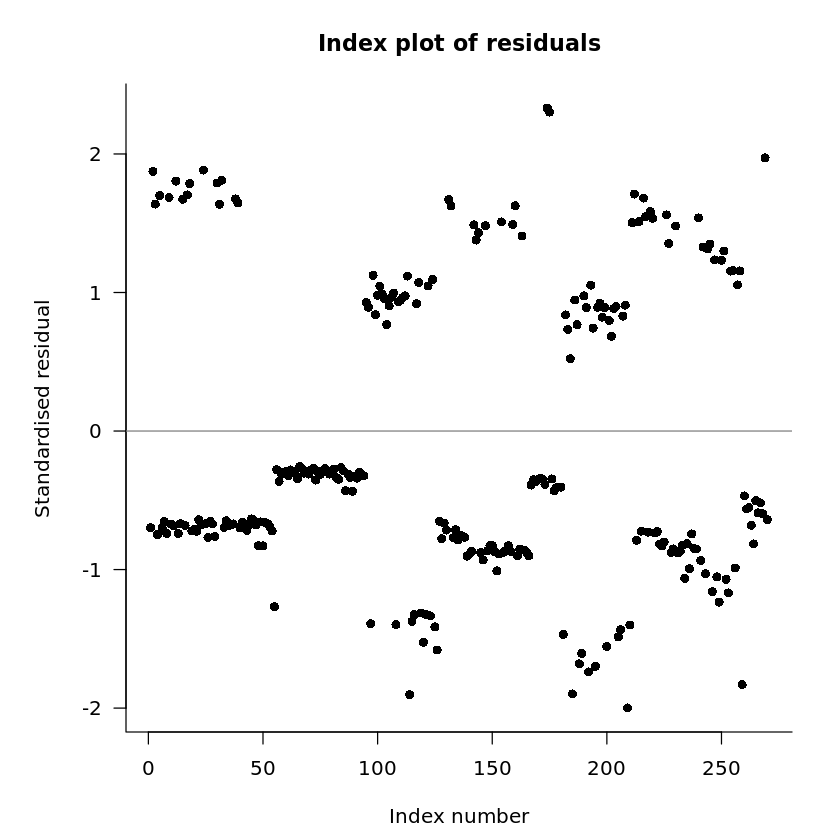

In [6]:
glmResidPlot(resAndDevFit, 2)

### (iv) 

Does the plot you obtained in part (c)(iii) suggest any problems with the model fitted in part (b)(i)?

#### Solution <a class="tocSkip">

In the plot we can see a definite pattern, suggesting that the independence assumption is questionable. Looking at the dataset (for example by running the command shown below), the observations are ordered by their product level. All of the data for level 10 of `product` are listed first in the dataset, and so on. So it might be this pattern arises because the model is not adequately capturing the relationship between participating in research and development and the type of product the company produces.

In [7]:
europeanCompanies$product

[1] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [26] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [51] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [76] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 20 20 20 20 20 20
[101] 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
[126] 20 20 20 20 20 20 20 20 20 20 20 20 20 22 22 22 22 22 22 22 22 22 22 22 22
[151] 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
[176] 22 22 22 22 22 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
[201] 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
[226] 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27
[251] 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
Levels: 10 20 22 26 27

### (v)

Remove the `#` and adapt the code below to produce a plot of squared standardised deviance residuals against index number for the model you fitted in part (b)(i).

In [8]:
# glmResidPlot(modelFit, 3)

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

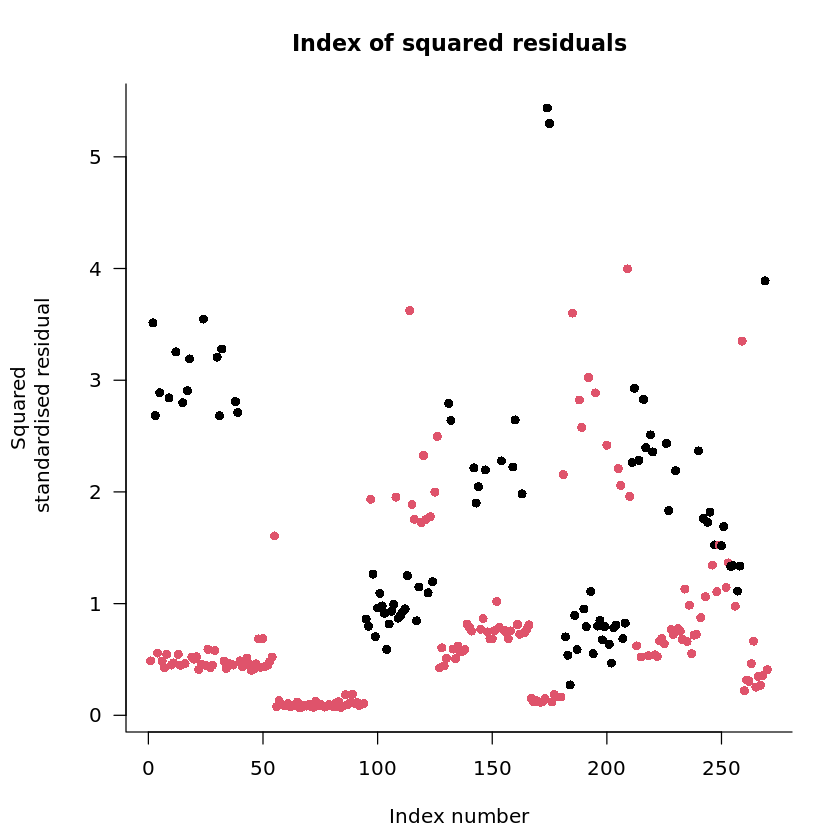

In [9]:
glmResidPlot(resAndDevFit, 3)

### (vi)

Does the plot you obtained in part (c)(v) suggest any problems with the model fitted in part (b)(i)?

#### Solution <a class="tocSkip">

In the plot we can see a definite pattern, suggesting that the independence assumption is questionable. The plot suggests that the *spread* of the residual depends on the index number (and hence on `product`?) as well as whether the residuals are positive or negative.

### (vii)

Remove the `#` and adapt the code below to produce a normal probability plot of the standardised deviance residuals for the model you fitted in part (b)(i).

In [10]:
# glmResidPlot(modelFit, 4)

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

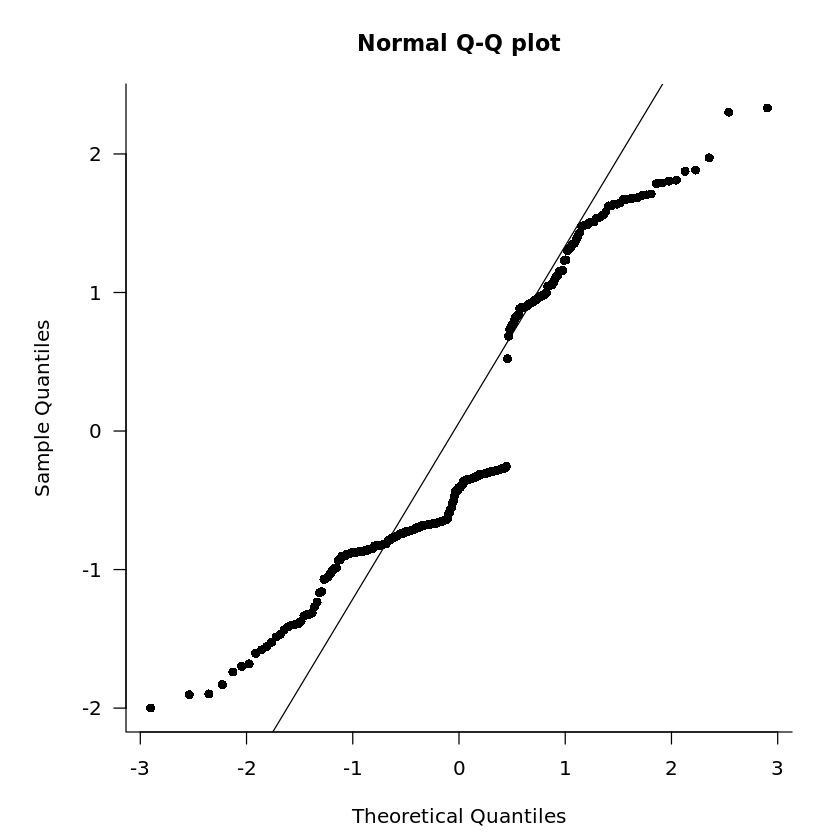

In [11]:
glmResidPlot(resAndDevFit, 4)

### (viii)

Does the plot you obtained in part (c)(vii) suggest any problems with the model fitted in part (b)(i)?

#### Solution <a class="tocSkip">

The normal probability plot also looks a bit problematic, since the points tend to deviate from the line systemmatically. However, given that the standardised deviance residuals are only *approximately* $N(0,1)$, the assumption of the response distribution being Bernoulli doesn't seem totally unreasonable. 

---

###  <a class="tocSkip">

As you have seen when working through parts (c)(i) to (c)(viii), the diagnostic plots suggest there are might be problems with the model. In particular that the relationship between `resAndDev` and `product` might not be adequately modelled. This is something that could be investigated further to help find a better model. 

## (d) Producing multiple diagnostic plots

In part (c) you produced the different types of diagnostic plots one-by-one. It is possible to produce all four diagnostic plots at once. For example, if the model we wish to produce diagnostic plots for is stored in an object called `modelFit` the command is:

`glmResidPlot(modelFit)`

### (i)

Remove the `#` and adapt the code below to produce all four diagnostic plots for the model you fitted in part (b)(i) using a single command.

In [12]:
# glmResidPlot(modelFit)

#### Solution <a class="tocSkip">

The code and resulting four plots are given below.

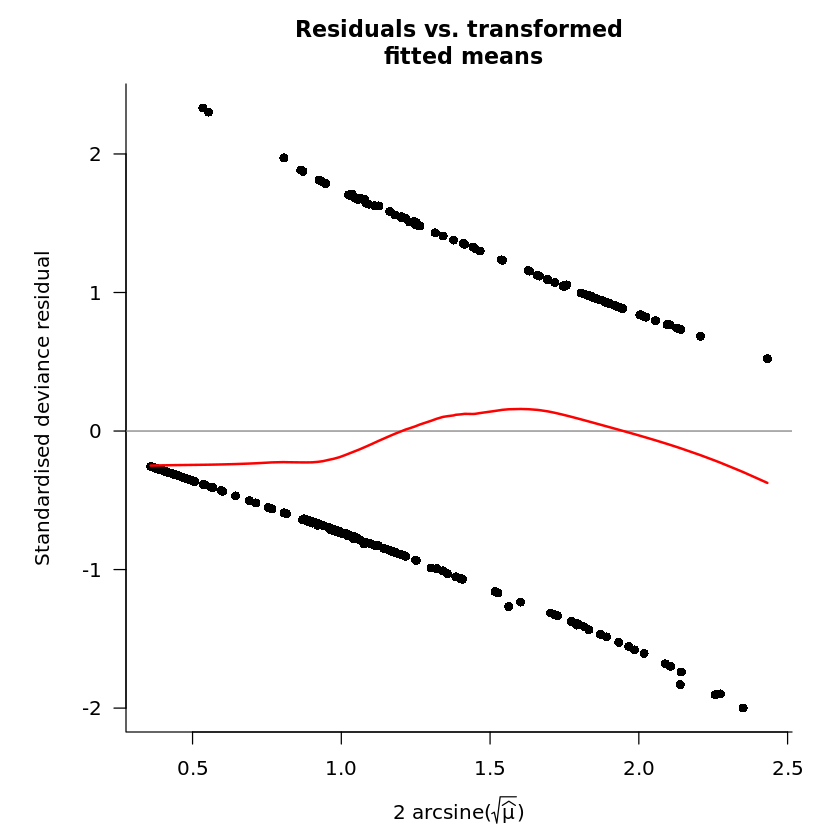

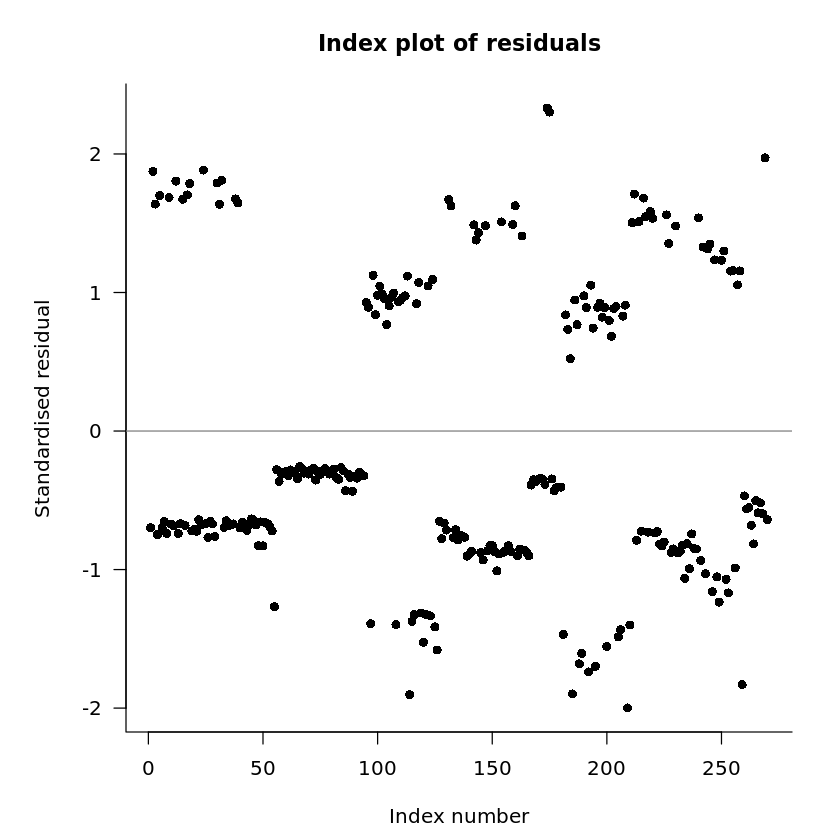

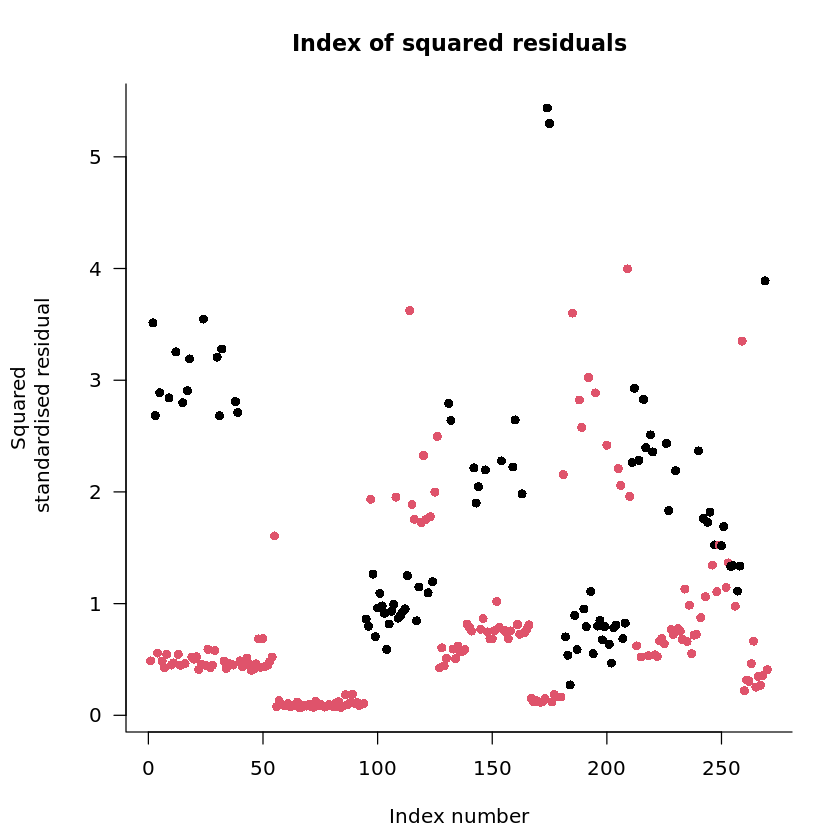

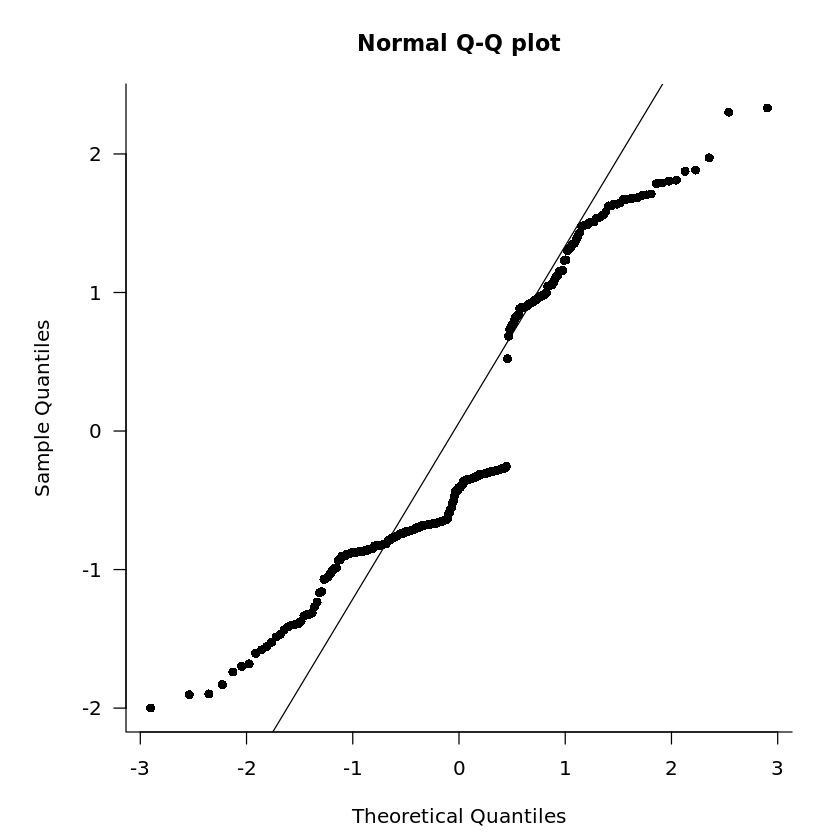

In [13]:
glmResidPlot(resAndDevFit)